In [4]:
from IPython.display import Image
from math import atan2, sqrt, sin, cos, radians, atan


# Algorithme COordinate Rotation DIgital Computer

Les premières machines et calcultaeurs ne pouvaient executer qu'uniquement des additions et soustractions. Le problème est que ces opérations ne suffisent pas à la plupart des scientifiques. Ainsi l'algorithme CORDIC a été crée. Il permet le calcul de fonctions trigonométriques en utilisant uniquement des additions et soustractions. Cela relève d'une prouesse. On se propose donc de découvrir et d'implémenter ce bel algorithme.

## Quelques bases mathématiques

Avant tout, il faut comprendre les bases sur les différentes fonctions sinus, cosinus et tangeante. Ceci n'est pas un cours de maths de 3ème.


On peut facilement visualiser à quoi respondent ces fonctions en utilisant le cercle trigonométrique : 

In [2]:
Image(url="https://lecluseo.scenari-community.org/2DE/Trigonometrie/res/cercletrigo.png")

** à noter ** : on définit la tangeante par : $ \tan(x)= \frac {\sin x}{\cos x}$. On remarquera que le domaine de définition de $\tan$ est limité par sa définition sur $]-k \frac \pi 2, k \frac \pi 2[, k \in \mathbb Z$

Comme écrit sur ce dessin, on lit la valeur du cosinus d'une valeur sur l'axe des abscisses et le sinus sur l'oronnée.

Prenons un exemple : $sin(45°)=sin(\frac  \pi 4)= \frac {\sqrt 2} 2$

De là, nous pouvons facilement donner plusieurs formules qui découlent des propriétées de symétrie des fonctions cosinus et sinus :

$ \forall x \in \mathbb R$
- $ \sin (2 \pi + x)= \sin(x)$
- $ \cos(2 \pi + x)= \cos(x)$
- $\sin(-x)=- \sin(x)$
- $ \cos(-x)= \cos(x)$
- $ \sin (\pi - x)= \sin(x)$
- $\cos ( \pi - x)=-cos (x)$
- $\sin( \pi + x)= - \sin(x)$
- $\cos( \pi + x)= - \cos(x)$
- $ \sin (\frac \pi 2 - x)= \cos(x)$
- $ \cos ( \frac \pi 2 -x)= \sin(x)$
- $ \sin( \frac \pi 2 + x)= -\cos(x)$
- $ \cos (\frac \pi 2 + x)=- \sin(x)$

Bien que cela ne soit pas très digeste, ce premier formulaire nous est très important. En effet, la méthode CORDIC que nous allons décrire après ne peut effectivement que calculer des angles $ \theta $ se troucant entre $ 0 $ et $ \frac \pi 2$. Grace aux formulaire, nous allons donc pourvoir, peut importe la valeur de l'angle, nous rammener à unn cas calculable.

A noter : on utilisera uniquement les radians comme unité pour les angles et non les degrés. ($180°= \pi$)

## Un peu d'histoire

L'algorithme CORDIC a initialement été proposé par Jack E.Volder en 1956, inspiré par une formule durant ses recherches. Le but était de pouvoir calculer des valeurs de fonctions trigonométriques (et plus tard hyperboliques mais aussi des multiplications et divisions) de façon beaucoup plus rapide et précise que ce qui se faisait alors. Plus tard, des versions améliorées de l'algorithme ont été proposées, permettant notemment de calculer les valeurs prises par les fonction exponentielles, logarithmique et bien plus.

## Principe mathématique

Le but est de commencer avec un vecteur $ V_0 = \begin{pmatrix}0 \\ 1 \end{pmatrix}$. Ensuite, on lui applique une rotation de $ \frac \pi 4$ dans le sens trigonométrique. Dans l'itération suivante, on applique une rotation d'angle inférieur au précédent, dans le "bon" sens, puis ainsi de suite.

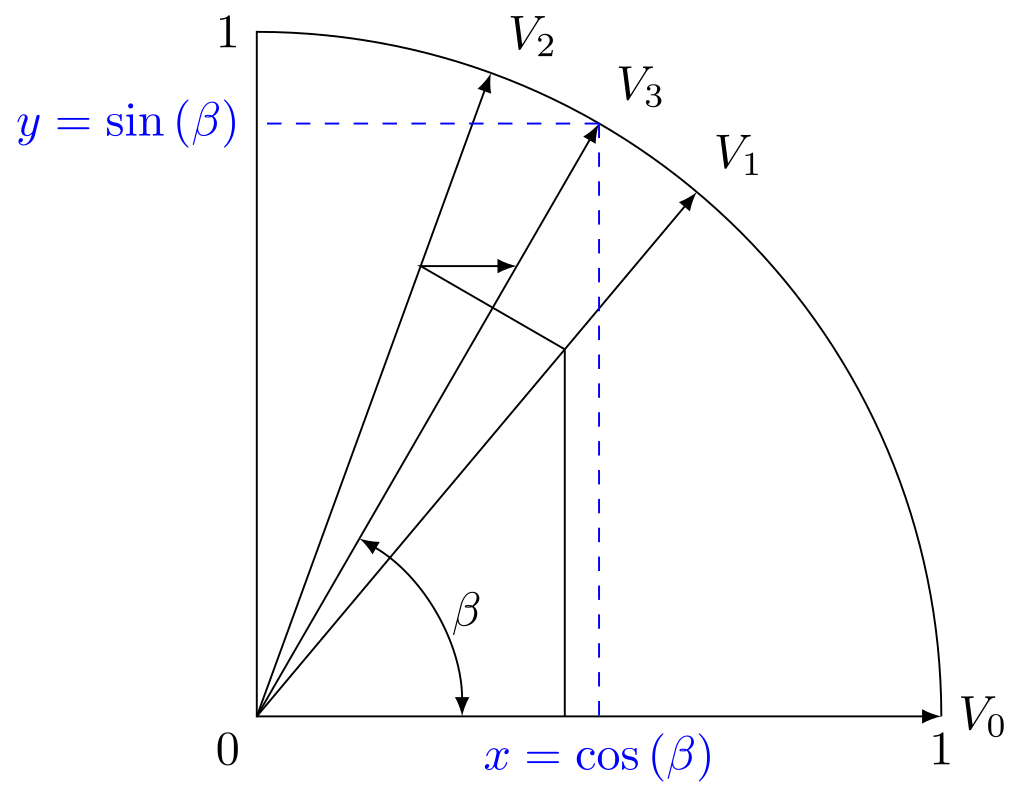

In [4]:
Image(filename="CORDIC.png")

On peut écrire ces opérations un peu plus formellement : 
$\forall i \in \mathbb N,$

$V_{i+1} = \begin{pmatrix} \cos \gamma _i & -\sigma _i \sin \gamma _i \\ \sigma _i \sin \gamma _i & \cos \gamma _ i \end{pmatrix} V_i$

où $ \sigma _i$ prend la valeur $1$ ou $-1$ selon s'il faut appliquer la rotation dans le sens trigonométrique ou horaire. 

On factorise ensuite l'expression par $ \cos \gamma _i$ : 

$V_{i+1} = \cos \gamma _i \begin{pmatrix} 1 & -\sigma _i \tan \gamma _i \\ \sigma _i \sin \gamma _i & \cos \gamma _i \end{pmatrix} V_i$

Or, le principe de l'algorithme repose sur le fait de ne choisir de angles $\gamma _i$ tels que $ \tan \gamma _i = 2^{-i}$. Cela donne alors : 

$V_{i+1} = \cos( \arctan (2^{-i})) \begin{pmatrix} 1 & - \sigma _i 2^{-i} \\ \sigma _i 2^{-i} & 1 \end{pmatrix}\begin{pmatrix} x_i \\ y_i \end{pmatrix}$

On notera $\forall i, K_i = \cos (\arctan 2^{-i})$ de sorte que l'on exprimera la valeur du produit de ces constantes après n itérations : 

$ K(n) = \Pi _ {i=0} ^{n-1} \frac 1 {\sqrt{1 + 2^{-2i}}}$

Ainsi, après assez d'itérations, la vecteur $V$ tendra vers l'angle initialement voulu

Il reste enfin à déterminer la valeur de $ \sigma _i, \forall i$.

Pour cela, on note $ \beta $ l'angle voulu et $ \beta _i $ l'angle atetint à la i-ème itération. Il suffit alors de prendre le signe de la différence $ \beta _i - \beta $.

##### Résultat
Après assez d'itérations, on aura donc $ x = \cos \beta $ et $ y = \sin \beta$

## Optimisations en temps et en espace de l'algorithme 

Nous pouvons facilement optimiser un peu l'algorithme en suivant quelques méthodes : 
- On peut aisément faire l'approximation $ \arctan 2^{-i}= 2^{-i}$
- On peut stocker les valeurs des $2^{-i}$ dans un tableau de mémoïsation
- On peut aussi limiter le nombre d'itérations si l'on renseigne un précision voulue

## Implémentation

On commence par faire une fonction qui permet de calculer le facteur $K(n)$ :

In [5]:
def fact_K(n:int) -> float:
    K = 1.0
    for i in range (n):
        K *= (1 + 2**(-2*i))**(0.5)
    return (1 / K) #un peu plus smart niveau complexité
print(fact_K(10))
print(fact_K(2000))
print(fact_K(100000))

0.6072533210898752
0.6072529350088813
0.6072529350088813


On peut maintenant implémenter l'algorithme de CORDIC :

In [6]:
n = 30 #nombre d'itérations

arc_tan = [atan(2**(-i)) for i in range(n)]



def CORDIC(beta: float, n: int):
    Kn = fact_K(n)
    betai = 0.0
    xi, yi = 1.0, 0.0 #vecteur V_0
    
    for i in range(n):
        sigm = +1 if betai < beta else -1
        betai += sigm * arc_tan[i]
        

        if sigm == +1:
            xi, yi = xi - (yi * (2.0**-i)), yi + (xi * (2.0**-i))
        else:
            xi, yi = xi + (yi * (2.0**-i)), yi - (xi * (2.0**-i))
    
    return xi * Kn, yi * Kn

print("  x       sin(x)     diff. sine     cos(x)    diff. cosine ")
for x in range(-90, 91, 15):
        cos_x, sin_x = CORDIC(radians(x), n)
        print(
            f"{x:+05.1f}°  {sin_x:+.8f} ({sin_x-sin(radians(x)):+.8f}) {cos_x:+.8f} ({cos_x-cos(radians(x)):+.8f})"
        )



  x       sin(x)     diff. sine     cos(x)    diff. cosine 
-90.0°  -1.00000000 (+0.00000000) +0.00000000 (+0.00000000)
-75.0°  -0.96592583 (-0.00000000) +0.25881904 (-0.00000000)
-60.0°  -0.86602540 (-0.00000000) +0.50000000 (-0.00000000)
-45.0°  -0.70710678 (+0.00000000) +0.70710678 (+0.00000000)
-30.0°  -0.50000000 (+0.00000000) +0.86602540 (+0.00000000)
-15.0°  -0.25881904 (+0.00000000) +0.96592583 (+0.00000000)
+00.0°  -0.00000000 (-0.00000000) +1.00000000 (-0.00000000)
+15.0°  +0.25881904 (-0.00000000) +0.96592583 (+0.00000000)
+30.0°  +0.50000000 (-0.00000000) +0.86602540 (+0.00000000)
+45.0°  +0.70710678 (+0.00000000) +0.70710678 (-0.00000000)
+60.0°  +0.86602540 (+0.00000000) +0.50000000 (-0.00000000)
+75.0°  +0.96592583 (+0.00000000) +0.25881904 (-0.00000000)
+90.0°  +1.00000000 (-0.00000000) +0.00000000 (+0.00000000)


Peut etre vous avez vous remarqué que dans ce programme, on effectue des multiplications alros que nous avions promit de n'utiliser que des additions et osustractions. En fait, une division par des puissances de deux revient a décaler les bits du chiffre divisé n fois (n la puissance). Donc l'algorithme n'utilise bien que des opérations "triviales" !

## Conclusion

Comme vous l'aurez remarqué au résultat du programme précédent, notre fonction marche très bien ! 
En seulement 30 itérations, on calcule les sinus et cosinus avec une très grande précision, en n'utilisant uniquement des opératiosn simples pour les circuits intégrés. 

De plus, cet algorithme peut très facilement être étendu à d'autres fonctions comme le sinus hyperbolique, le cosinus hyperbolique, l'exponentielle, le logarithme etc... 

##### Sources

- https://en.wikipedia.org/wiki/CORDIC#cite_note-Luo_2019_TVLSI-5
- https://digitalsystemdesign.in/wp-content/uploads/2019/01/cordic1.pdf